# Exploratory Visual Analysis

## Table of Contents:

1. Import Libraries + Data
2. Questions to Answer
3. Correlation Matrix Heat Map
4. Scatter Plot
5. Pair Plots
6. Categorical Plot
7. Answer Initial Questions
8. Hypothesis

## 01. Import Libraries + Data

In [2]:
# importing libraries (add visualization libraries after I read 6.02)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# import data path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [4]:
path

'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [5]:
# import merged beer and transactions data set
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'beer_transactions.pkl'))

In [6]:
df_merge.head()

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,...,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/3/2022,2022,...,3,Sunday,0:00,2.0,420.00,180.00,140.00,50.00,30.00,both
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/9/2022,2022,...,9,Saturday,13:00,4.0,960.00,240.00,400.00,71.43,20.00,both
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/19/2022,2022,...,19,Tuesday,20:00,5.0,1440.00,60.00,740.00,105.71,4.00,both
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,3/20/2022,2022,...,20,Sunday,17:00,4.0,412.23,277.77,52.23,14.51,40.26,both
4,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,3/23/2022,2022,...,23,Wednesday,17:00,2.0,360.00,40.00,180.00,100.00,10.00,both


In [7]:
# display all columns
pd.options.display.max_columns = None

In [8]:
df_merge.head(3)

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/3/2022,2022,Jul,3,Sunday,0:00,2.0,420.0,180.0,140.0,50.00,30.0,both
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/9/2022,2022,Jul,9,Saturday,13:00,4.0,960.0,240.0,400.0,71.43,20.0,both
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,7/19/2022,2022,Jul,19,Tuesday,20:00,5.0,1440.0,60.0,740.0,105.71,4.0,both


In [9]:
df_merge.shape

(50081, 21)

In [10]:
df_merge.columns

Index(['product_code', 'vendor', 'name', 'retail_price', 'product_unit',
       'vendor_country', 'size', 'abv', 'full_date', 'year', 'month',
       'day_of_month', 'day_of_week', 'time', 'units_sold', 'revenue',
       'discount', 'profit', 'percent_markup', 'percent_discount', '_merge'],
      dtype='object')

## 02. Questions to Answer

- How do sales/profits look across time? Specifically look at a month to month basis.
- What’s the difference in units sold, revenue, profit for beers with lower and high abv?
- How often are beers being discounted, is there a pattern?
- How do sales look per vendor countries?
- If there is a higher percent markup, are sales higher or lower?

### Are there any variables to discard in order to perform exploratory visual analysis?
- look at dtypes again

In [11]:
df_merge.dtypes

product_code          object
vendor                object
name                  object
retail_price         float64
product_unit          object
vendor_country        object
size                 float64
abv                  float64
full_date             object
year                   int64
month                 object
day_of_month           int64
day_of_week           object
time                  object
units_sold           float64
revenue              float64
discount             float64
profit               float64
percent_markup       float64
percent_discount     float64
_merge              category
dtype: object

### remove product_code, vendor, name, product_unit, vendor_country, full_date, month, day_of_week, time, _merge

### NOTES - I want to change my data types for month, day_of_week, and time into an int64 or float64 so I can use it for a correlation matrix heatmap

## 03. Correlation Matrix Heatmap

In [12]:
df_merge.isnull().sum()

product_code            0
vendor                  0
name                    0
retail_price            0
product_unit            0
vendor_country          0
size                 5833
abv                  5847
full_date               0
year                    0
month                   0
day_of_month            0
day_of_week             0
time                    0
units_sold              0
revenue                51
discount            10202
profit                 14
percent_markup       1936
percent_discount    10202
_merge                  0
dtype: int64

In [13]:
# use describe to look at median for imputing values into columns with small amount of NaNs
df_merge.describe()

,retail_price,size,abv,year,day_of_month,units_sold,revenue,discount,profit,percent_markup,percent_discount
count,50081.000000,44248.000000,44234.000000,50081.000000,50081.000000,50081.000000,50030.000000,39879.000000,50067.000000,48145.000000,39879.000000
mean,508.305634,0.629007,6.610985,2020.616781,15.738564,3.551722,1429.352217,243.763997,705.424474,109.184511,17.251691
std,340.652038,0.876320,2.143129,0.730022,8.816199,5.481245,2417.688709,405.914457,1348.901298,1182.538753,16.608473
min,1.000000,0.150000,0.500000,2020.000000,1.000000,0.033000,0.410000,0.010000,-9300.630000,-100.000000,0.010000
25%,300.000000,0.330000,5.100000,2020.000000,8.000000,1.000000,330.000000,60.000000,143.060000,59.850000,7.930000
50%,380.000000,0.500000,6.000000,2020.000000,16.000000,2.000000,630.000000,121.760000,283.000000,84.210000,12.000000
75%,600.000000,1.000000,7.800000,2021.000000,23.000000,4.000000,1435.990000,270.600000,686.980000,107.790000,20.210000
max,8484.850000,30.000000,18.400000,2022.000000,31.000000,248.000000,58184.070000,20440.630000,33352.460000,79900.000000,100.000000


In [14]:
df_merge.median()

/var/folders/w0/qzmf_lf542x0x6lpcdj7lnww0000gn/T/ipykernel_29953/292585046.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.median()


product_code        2098.00
retail_price         380.00
size                   0.50
abv                    6.00
year                2020.00
day_of_month          16.00
units_sold             2.00
revenue              630.00
discount             121.76
profit               283.00
percent_markup        84.21
percent_discount      12.00
dtype: float64

In [15]:
# impute median value to NaNs in revenue
df_merge['revenue'] = df_merge['revenue'].fillna(df_merge['revenue'].median())

In [16]:
# impute median value to NaNs in profit
df_merge['profit'] = df_merge['profit'].fillna(df_merge['profit'].median())

In [17]:
# impute median value to NaNs in percent_markup
df_merge['percent_markup'] = df_merge['percent_markup'].fillna(df_merge['percent_markup'].median())

In [18]:
df_merge.isnull().sum()

product_code            0
vendor                  0
name                    0
retail_price            0
product_unit            0
vendor_country          0
size                 5833
abv                  5847
full_date               0
year                    0
month                   0
day_of_month            0
day_of_week             0
time                    0
units_sold              0
revenue                 0
discount            10202
profit                  0
percent_markup          0
percent_discount    10202
_merge                  0
dtype: int64

In [19]:
df_merge_2 = df_merge[['retail_price', 'year', 'day_of_month', 'units_sold', 'revenue', 'profit', 'percent_markup']].copy()

In [20]:
df_merge_2.head(3)

,retail_price,year,day_of_month,units_sold,revenue,profit,percent_markup
0,300.0,2022,3,2.0,420.0,140.0,50.00
1,300.0,2022,9,4.0,960.0,400.0,71.43
2,300.0,2022,19,5.0,1440.0,740.0,105.71


In [21]:
df_merge_2.corr()

,retail_price,year,day_of_month,units_sold,revenue,profit,percent_markup
retail_price,1.000000,0.013830,-0.000771,-0.081495,0.181776,0.115795,0.004377
year,0.013830,1.000000,0.001770,0.189046,0.156149,0.139273,0.015464
day_of_month,-0.000771,0.001770,1.000000,0.038632,0.039553,0.036895,0.008035
units_sold,-0.081495,0.189046,0.038632,1.000000,0.775267,0.765489,-0.001971
revenue,0.181776,0.156149,0.039553,0.775267,1.000000,0.967529,0.002563
profit,0.115795,0.139273,0.036895,0.765489,0.967529,1.000000,0.012950
percent_markup,0.004377,0.015464,0.008035,-0.001971,0.002563,0.012950,1.000000


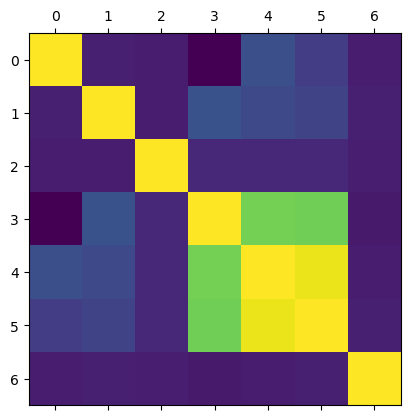

In [22]:
# create a correlation heatmap with matplotlib
plt.matshow(df_merge_2.corr())
plt.show()

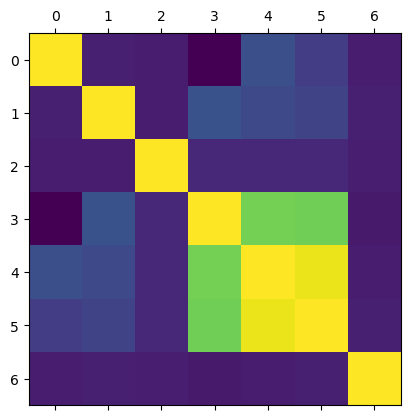

In [23]:
# save image
plt.matshow(df_merge_2.corr())
plt.savefig("out.png")

In [24]:
# current directory
cwd = os.getcwd()
cwd

'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

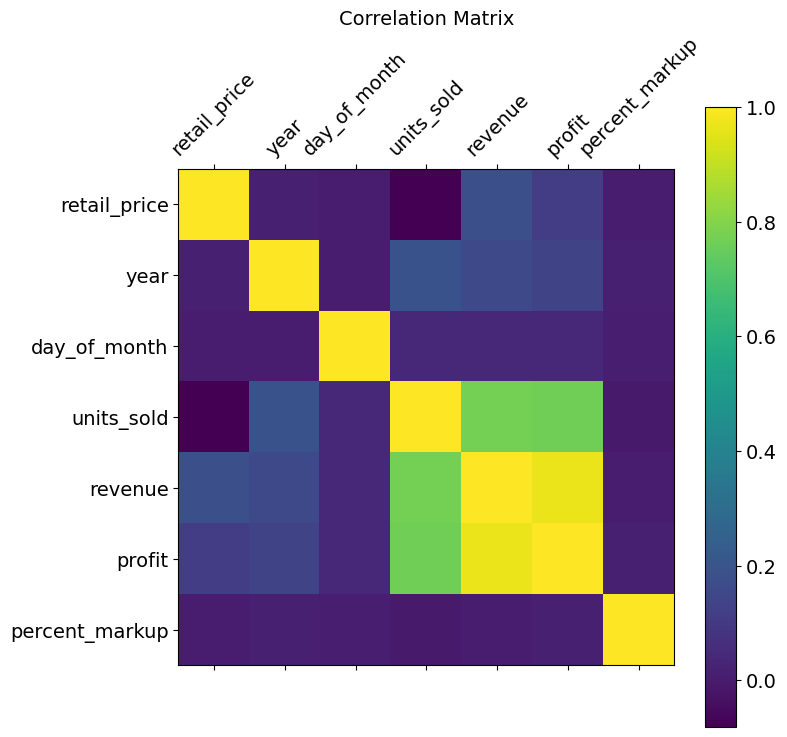

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_merge_2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_merge_2.shape[1]), df_merge_2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_merge_2.shape[1]), df_merge_2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

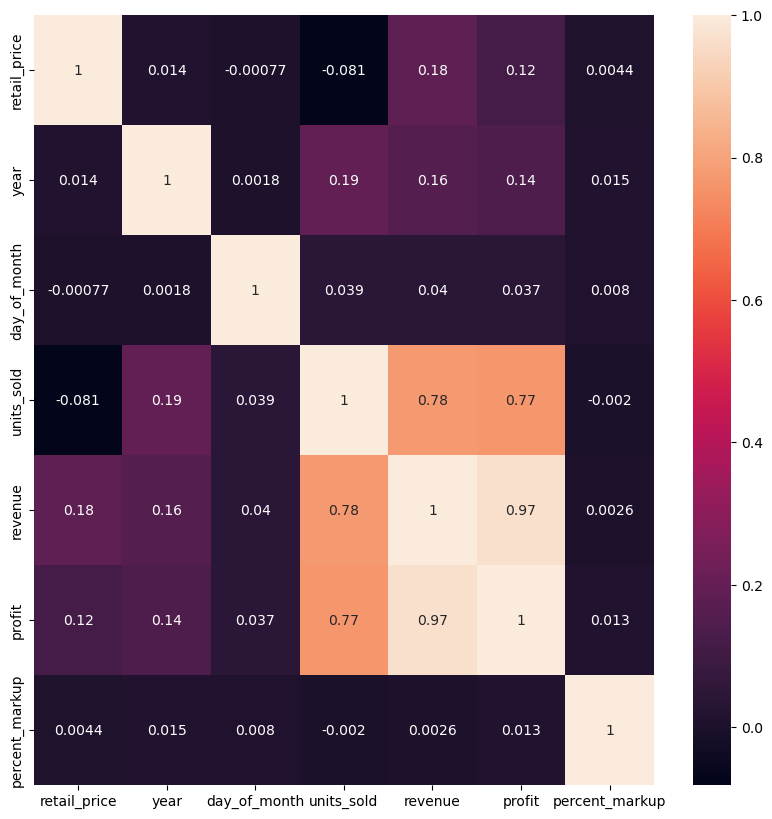

In [26]:
# create a correlation heatmap with seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_merge_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### NOTES - The strongest coefficients we see are 0.97 for revenue and profit, 0.78/0.77 for untis_sold and revenue/profit. Some coefficients I wanted to look at were day of the month and year with profit. Year and units_sold, revenue, and profit all are 0.1_ which is considered a weak relationship. Day of the month and profit is 0.04 which shows no relationship.

## 04. Scatter Plot

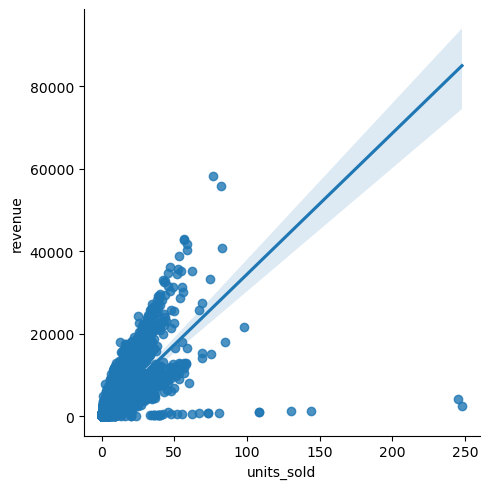

In [27]:
# scatterplot for unit's sold and revenue

scatter = sns.lmplot(x = 'units_sold', y = 'revenue', data = df_merge_2)

### NOTES - The trend line is very steep in this scatterplot and most points do not follow the line up as the number of units_sold goes up. We can assume it is a good fit when units_sold is in the 0-50 range. It looks like there is a positive correlation when untis_sold is closer to 0. There are several outliers here as well. I would say there isn't enough info here to explain a full picture of the relationship between these variables. There is a need for further investigation.

In [28]:
# save scatter
scatter.savefig("out_2.png")

In [29]:
cwd = os.getcwd()
cwd

'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis/03 Scripts'

## 05. Pair Plots

In [30]:
df_merge_pair = df_merge[['vendor_country', 'size', 'abv', 'year', 'month', 'day_of_week', 'time', 'units_sold', 'revenue', 'profit']].copy()

In [31]:
df_merge_pair.head(3)

,vendor_country,size,abv,year,month,day_of_week,time,units_sold,revenue,profit
0,Russia,0.375,4.5,2022,Jul,Sunday,0:00,2.0,420.0,140.0
1,Russia,0.375,4.5,2022,Jul,Saturday,13:00,4.0,960.0,400.0
2,Russia,0.375,4.5,2022,Jul,Tuesday,20:00,5.0,1440.0,740.0


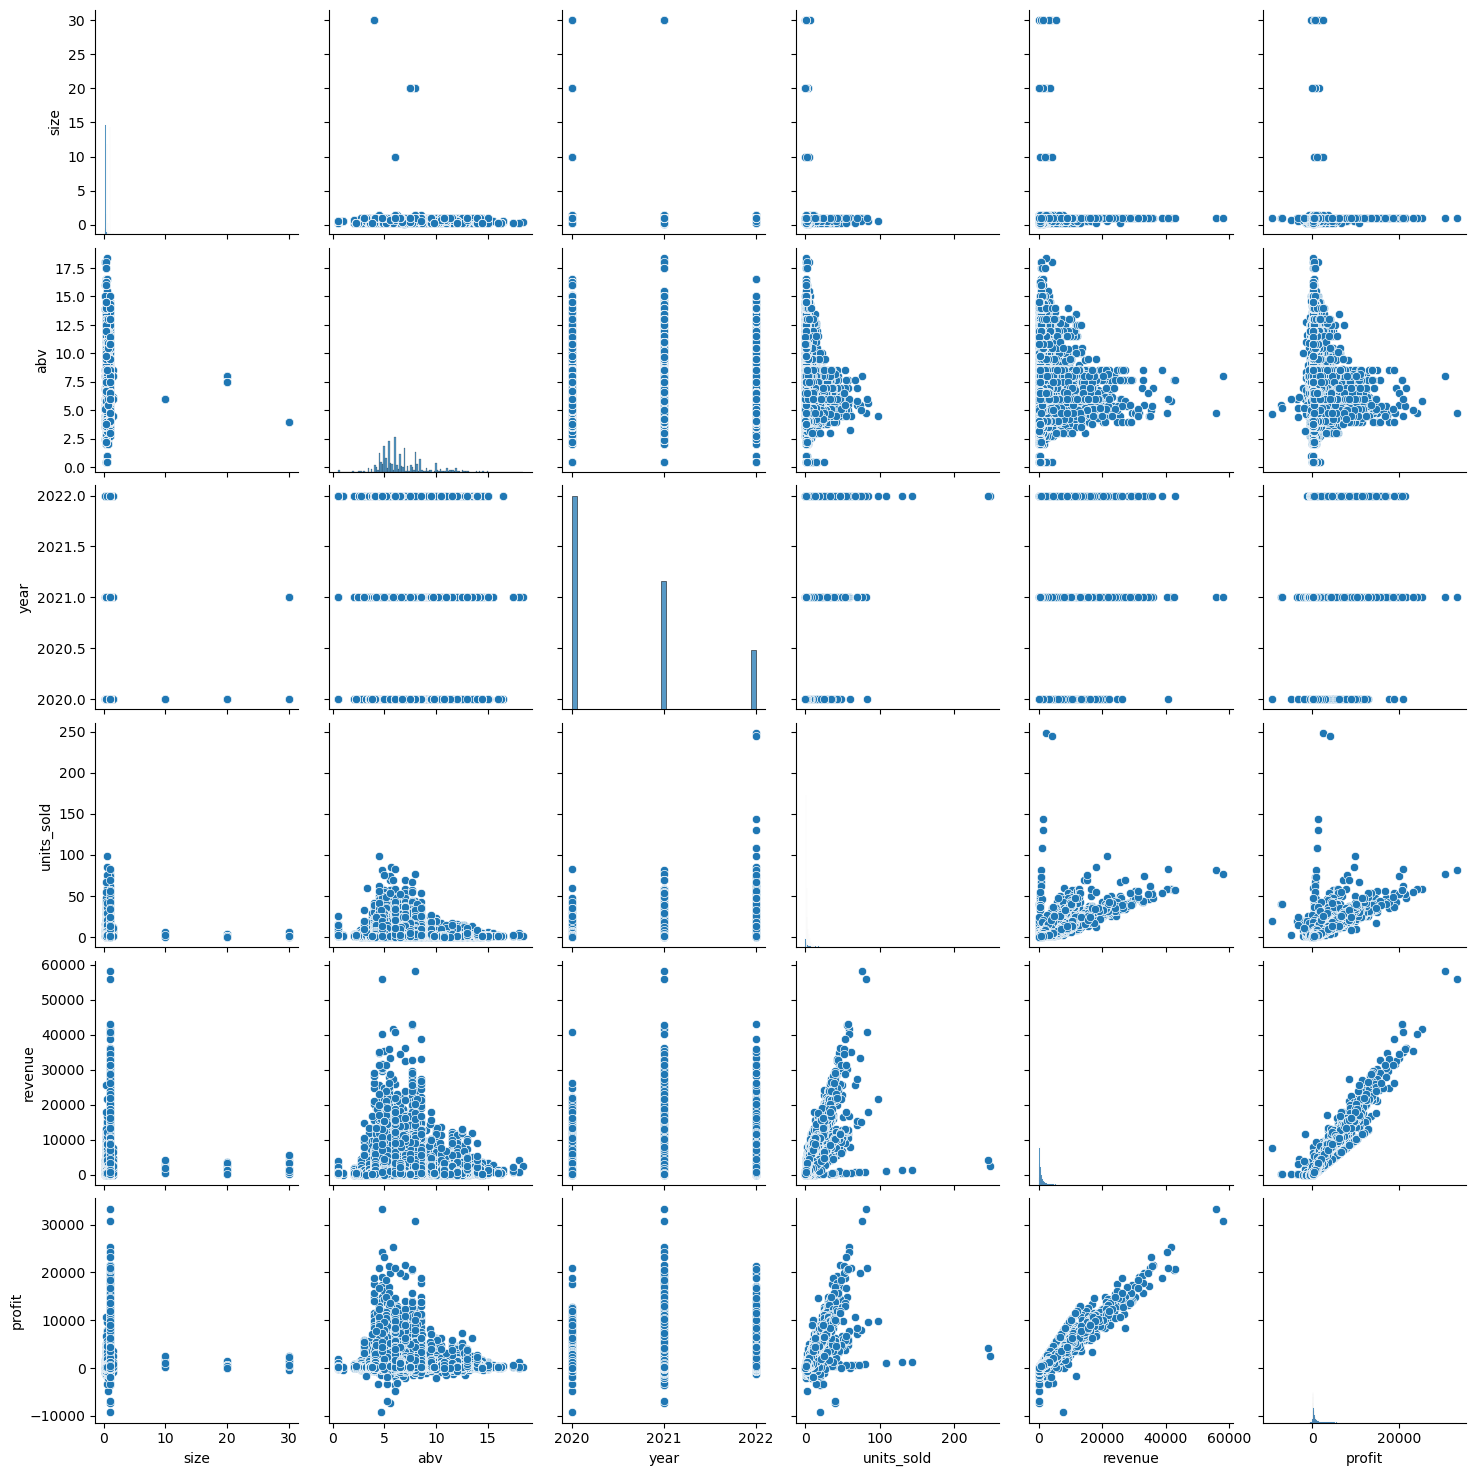

In [32]:
# create pair plot

pair = sns.pairplot(df_merge_pair)

### NOTES - Viewing the bottom row of scatter plots, the more revenue, the higher the profit and the more units sold, the higher the profit. I'd like to look into the abv and profit scatter plot and see what this relationship is like.

## 06. Categorical Plot

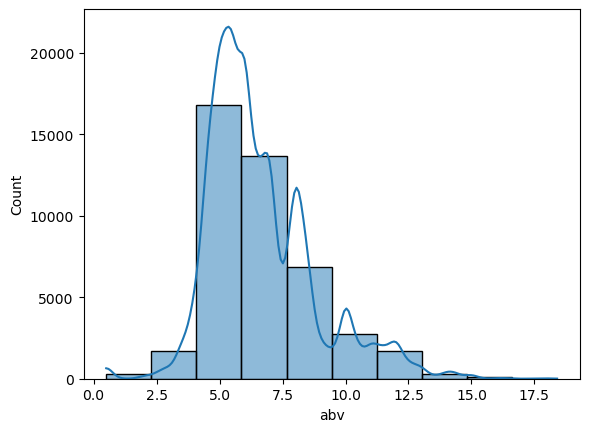

In [33]:
# create a histogram for abv distribution

hist = sns.histplot(df_merge['abv'], bins = 10, kde = True)

In [34]:
# save hist
hist.figure.savefig("out_3.png")

In [35]:
cwd = os.getcwd()
cwd

'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis/03 Scripts'

In [36]:
# function for new abv flag

df_merge.loc[df_merge['abv'] < 5.0, 'abv_category'] = 'low abv'

In [37]:
df_merge.loc[(df_merge['abv'] >= 5.0) & (df_merge['abv'] < 7.5), 'abv_category'] = 'regular abv'

In [38]:
df_merge.loc[df_merge['abv'] >= 7.5, 'abv_category'] = 'high abv'

In [39]:
df_merge['abv_category'].value_counts(dropna = False)

regular abv    23997
high abv       12542
low abv         7695
NaN             5847
Name: abv_category, dtype: int64

### NOTE - how do I get NaNs in the low to zero abv category?

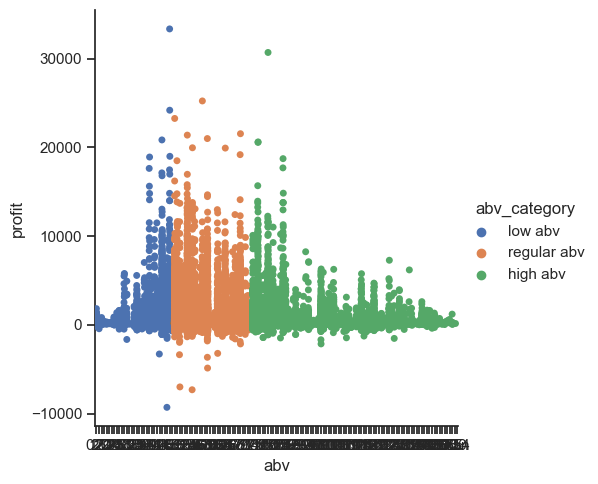

In [40]:
# create a categorical plot with abv category

sns.set(style="ticks")
cat = sns.catplot(x = 'abv', y = 'profit', hue = 'abv_category', data=df_merge)

In [41]:
# save cat fig

cat.savefig("out_4.png")

### NOTES - The distribution of profit looks the same across low, regular and high abv with there being the most amount of beers profitting between 0 and 500. The dots begin to sparse out around 1000 and up.

## 07. Answer Initial Questions

- I was able to look at the abv question and found that profit looks the same per each level of abv. Although, there are lower profits in the high abv category compared to the regular abv category. Also, there are lower profits in the beginning section of the low abv section. I want to look at which vendor countries are the most popular in the high abv category to see if the company could reduce the amount of high abv beers they are importing.

- I still want to look at months and profit as well as time and profit. First, I need to convert these columns to a int64 or float64 data type as they are currently objects.

- Also, how would I look at profit per country?

- I found that day of month and profit shows no relationship in a correlation, but I'm thinking there is another way to look at this relationship as the day of month goes from 1-31 and is more of a categorical data type than an integer increasing in value from 1-31.

## 08. Hypothesis

- If the company keeps mostly (about 75% of inventory) regular abv beers in stock, they will increase their profits each year.

## Export Data Set

In [43]:
# export as pickle file
df_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merge_clean.pkl'))